# Data preprocessing

### READ DATA FROM .JSON.GZ FILE

In [1]:
import json
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Office_Products.json.gz')

In [2]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5.0,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5.0,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2.0,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5.0,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5.0,Still the best,1375574400,"08 4, 2013"
...,...,...,...,...,...,...,...,...,...
53253,A1ODOGXEYECQQ8,B00KYA0RC2,Nuknuk,"[0, 0]",What I like about this scale is you can power ...,4.0,Portable and very easy to use,1405555200,"07 17, 2014"
53254,A2XX2A4OJCDNLZ,B00KYA0RC2,RatherLiveInKeyWest,"[2, 2]",This Accuteck ShipPro digital scale works very...,5.0,Accuteck ShipPro Digital Postal Scale - Stand-...,1405296000,"07 14, 2014"
53255,A3LGT6UZL99IW1,B00KYA0RC2,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[1, 1]","I ship a lot of stuff. I sell small parts, ma...",5.0,"Extremely accurate, foolproof postal/shipping ...",1405468800,"07 16, 2014"
53256,A1XJOSJN6FHFO0,B00KYA0RC2,"Shirley Priscilla Johnson ""Author/Reviewer -...","[0, 0]",This is a great little scale to have. It can w...,5.0,"Fast, Easy and Accurate",1405814400,"07 20, 2014"


#### Splitting helpful column to numerics (cannot work with list data format )

In [3]:
helpfulness = df[['helpful','asin']]
helpfulness

,helpful,asin
0,"[3, 4]",B00000JBLH
1,"[7, 9]",B00000JBLH
2,"[3, 3]",B00000JBLH
3,"[7, 8]",B00000JBLH
4,"[0, 0]",B00000JBLH
...,...,...
53253,"[0, 0]",B00KYA0RC2
53254,"[2, 2]",B00KYA0RC2
53255,"[1, 1]",B00KYA0RC2
53256,"[0, 0]",B00KYA0RC2


In [4]:
df2 = pd.DataFrame(helpfulness)
df2[['helpful','total']] = pd.DataFrame(df2.helpful.values.tolist(), index=df2.index)
dfhelpful = df2[['asin', 'helpful','total']]
dfhelpful.info()
dfhelpful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 53257
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   asin     53258 non-null  object
 1   helpful  53258 non-null  int64 
 2   total    53258 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


,asin,helpful,total
0,B00000JBLH,3,4
1,B00000JBLH,7,9
2,B00000JBLH,3,3
3,B00000JBLH,7,8
4,B00000JBLH,0,0
...,...,...,...
53253,B00KYA0RC2,0,0
53254,B00KYA0RC2,2,2
53255,B00KYA0RC2,1,1
53256,B00KYA0RC2,0,0


In [5]:
df=df.drop('helpful',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 53257
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      53258 non-null  object 
 1   asin            53258 non-null  object 
 2   reviewerName    52799 non-null  object 
 3   reviewText      53258 non-null  object 
 4   overall         53258 non-null  float64
 5   summary         53258 non-null  object 
 6   unixReviewTime  53258 non-null  int64  
 7   reviewTime      53258 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.7+ MB


In [6]:
result = df.join(dfhelpful[['helpful','total']])
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 53257
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      53258 non-null  object 
 1   asin            53258 non-null  object 
 2   reviewerName    52799 non-null  object 
 3   reviewText      53258 non-null  object 
 4   overall         53258 non-null  float64
 5   summary         53258 non-null  object 
 6   unixReviewTime  53258 non-null  int64  
 7   reviewTime      53258 non-null  object 
 8   helpful         53258 non-null  int64  
 9   total           53258 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.0+ MB


## Missing data

### check for missing data using heatmap

<AxesSubplot:>

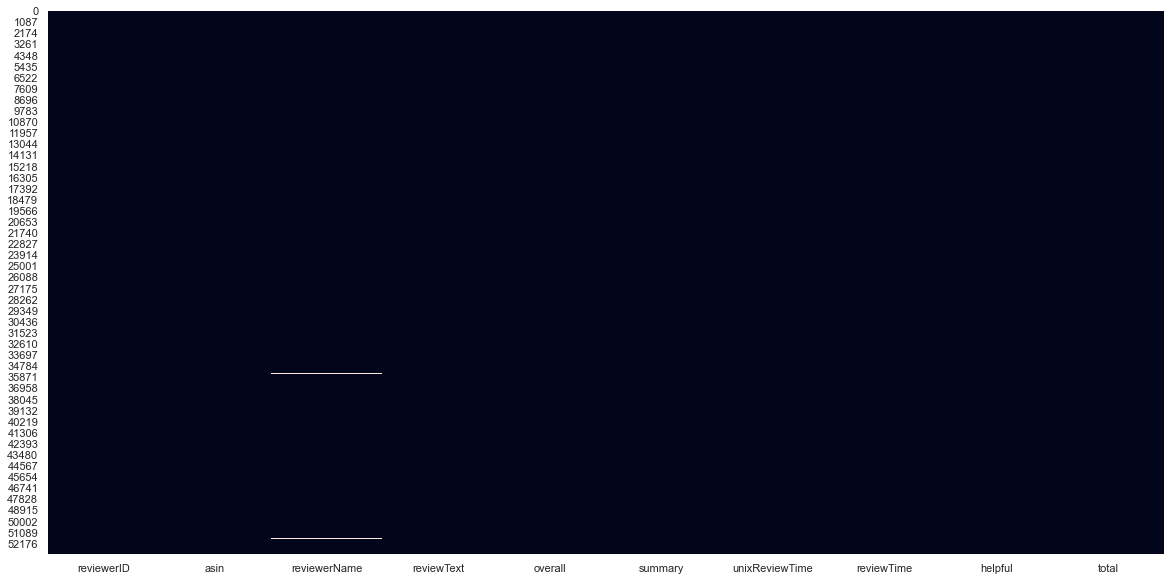

In [7]:
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(result.isnull(), cbar=False)

<AxesSubplot:>

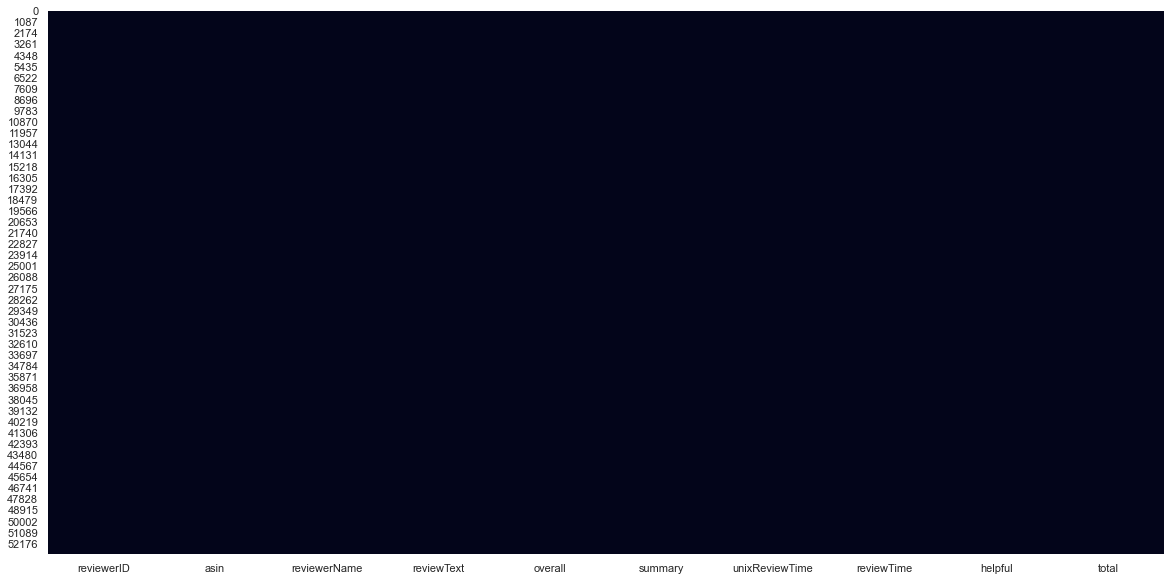

In [8]:
result["reviewerName"].fillna("Anonymous", inplace = True)  
sns.heatmap(result.isnull(), cbar=False)

In [9]:
i1 = result[(result['reviewText'] == "")].index
i2 = result[(result['summary'] == "")].index
for i in i1:
    if i in i2:
        result.drop(i, inplace = True)

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 53257
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      53258 non-null  object 
 1   asin            53258 non-null  object 
 2   reviewerName    53258 non-null  object 
 3   reviewText      53258 non-null  object 
 4   overall         53258 non-null  float64
 5   summary         53258 non-null  object 
 6   unixReviewTime  53258 non-null  int64  
 7   reviewTime      53258 non-null  object 
 8   helpful         53258 non-null  int64  
 9   total           53258 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.0+ MB


### Duplicates remove

In [11]:
result.drop_duplicates()
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53258 entries, 0 to 53257
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      53258 non-null  object 
 1   asin            53258 non-null  object 
 2   reviewerName    53258 non-null  object 
 3   reviewText      53258 non-null  object 
 4   overall         53258 non-null  float64
 5   summary         53258 non-null  object 
 6   unixReviewTime  53258 non-null  int64  
 7   reviewTime      53258 non-null  object 
 8   helpful         53258 non-null  int64  
 9   total           53258 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 7.0+ MB


In [12]:
result.to_csv('reviews.csv',index=False)